In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The dataset is highly imbalanced as we can see. Without using a balancing strategy, the use of original dataset to build a model would produce a highly overfitted model that won't be capable of detecting frauds. It would have high accuracy in predicting secure transactions but our objective here is to detect **fraudulent** transactions with high accuracy.

<AxesSubplot:xlabel='Class', ylabel='count'>

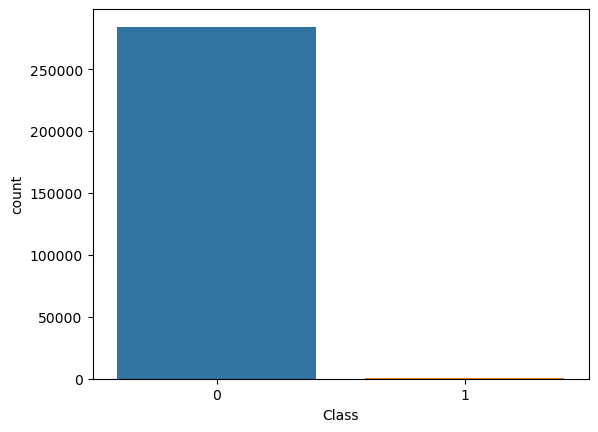

In [ ]:
sns.countplot(data=data_df, x='Class')

We need to see the distributions of our variables so we converted out dataframe into the long format to help plot every feature in one go using **sns.FacetGrid**. We can see that **Time** and **Amount** are the only variables that do not follow a normal distribution and are skewed. All the other variables are standardized and follow a normal curve, though some of them have long tails.

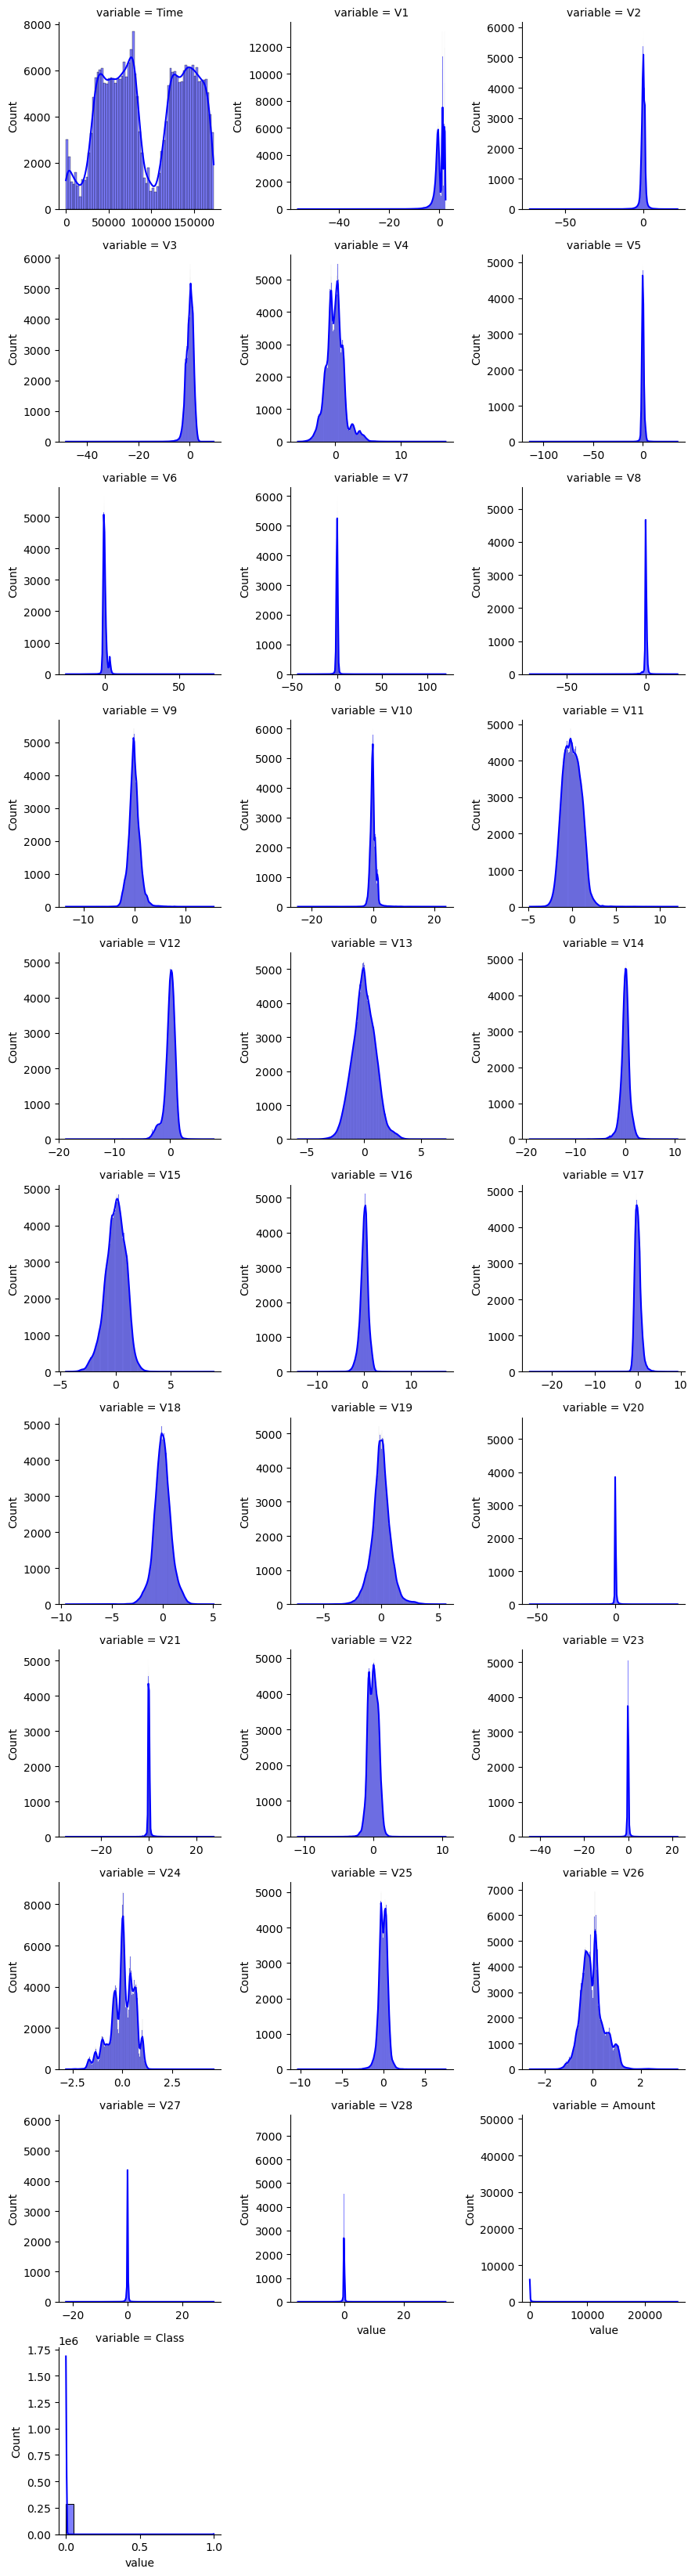

In [ ]:
# Reshape the dataframe into a "long" format
melted_df = pd.melt(data_df, value_vars=data_df.columns)

# Create a grid of plots with separate histograms and KDE plots for each variable
grids = sns.FacetGrid(melted_df, col='variable', col_wrap=3, sharex=False, sharey=False)
grids.map(sns.histplot, 'value', kde=True, color='blue')
plt.show()

## Scaling Time and Amount

We need to scale these variables as well in order to bring those values in the same range as other variables as models give weightage to variables that have high/low values (are not scaled).

In [ ]:
from sklearn.preprocessing import RobustScaler

# Using robust scaler as it is robust to outliers
robust_scaler = RobustScaler()

data_df['Time'] = robust_scaler.fit_transform(data_df['Time'].values.reshape(-1, 1))
data_df['Amount'] = robust_scaler.fit_transform(data_df['Amount'].values.reshape(-1, 1))

data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


## Subsampling Dataframe using UnderSampling

We need to create a sample of our data with equal number of Fraud and Not Fraud transactions so it is easier for the model to identify variables and patterns that would help to determine if a transaction is fraudulent.

The basic reason to create a subsample is that when the data is heavily imbalanced, there is a huge chance of our model overfitting. In this particular use case, our model will assume most of the times that the transaction is not fraud, while our focus is specifically on identifying fraudulent transactions.

As there are only 492 fraud transactions in our data, we shuffle the data completely and extract the first 492 not fraud transaction for our sample.

In [ ]:
data_df = data_df.sample(frac=1)

fraud_df = data_df[data_df['Class'] == 1]
not_fraud_df = data_df[data_df['Class'] == 0]

# Taking only 492 samples from not_fraud_df to cater class imbalance issue
not_fraud_df = not_fraud_df.iloc[:492]

# Joining the two dataframes for each class and reshuffling the rows
df = pd.concat([fraud_df, not_fraud_df]).sample(frac=1, random_state=42)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
120300,-0.104759,-5.379298,4.653354,-3.438608,1.052000,-3.708262,-1.229242,-3.466755,4.428975,-1.450676,...,0.679814,0.358670,0.628543,0.509051,0.107083,-0.416840,-2.044476,-0.511274,-0.210298,0
151008,0.113606,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,-0.293440,1
273590,0.950834,1.989084,-0.323853,-0.466053,0.116556,-0.439213,-0.251363,-0.567236,0.082085,1.124842,...,-0.100292,-0.190057,0.284624,-0.556827,-0.339725,-0.913460,0.053834,-0.042302,-0.293440,0
59539,-0.420682,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,-0.031719,1
46918,-0.489949,-4.423508,1.648048,-6.934388,4.894601,-5.078131,0.010849,-3.409096,1.409291,-3.260672,...,0.698359,0.487478,1.228698,-0.535217,0.388278,-0.009466,2.300164,0.081231,8.747293,1


In [ ]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

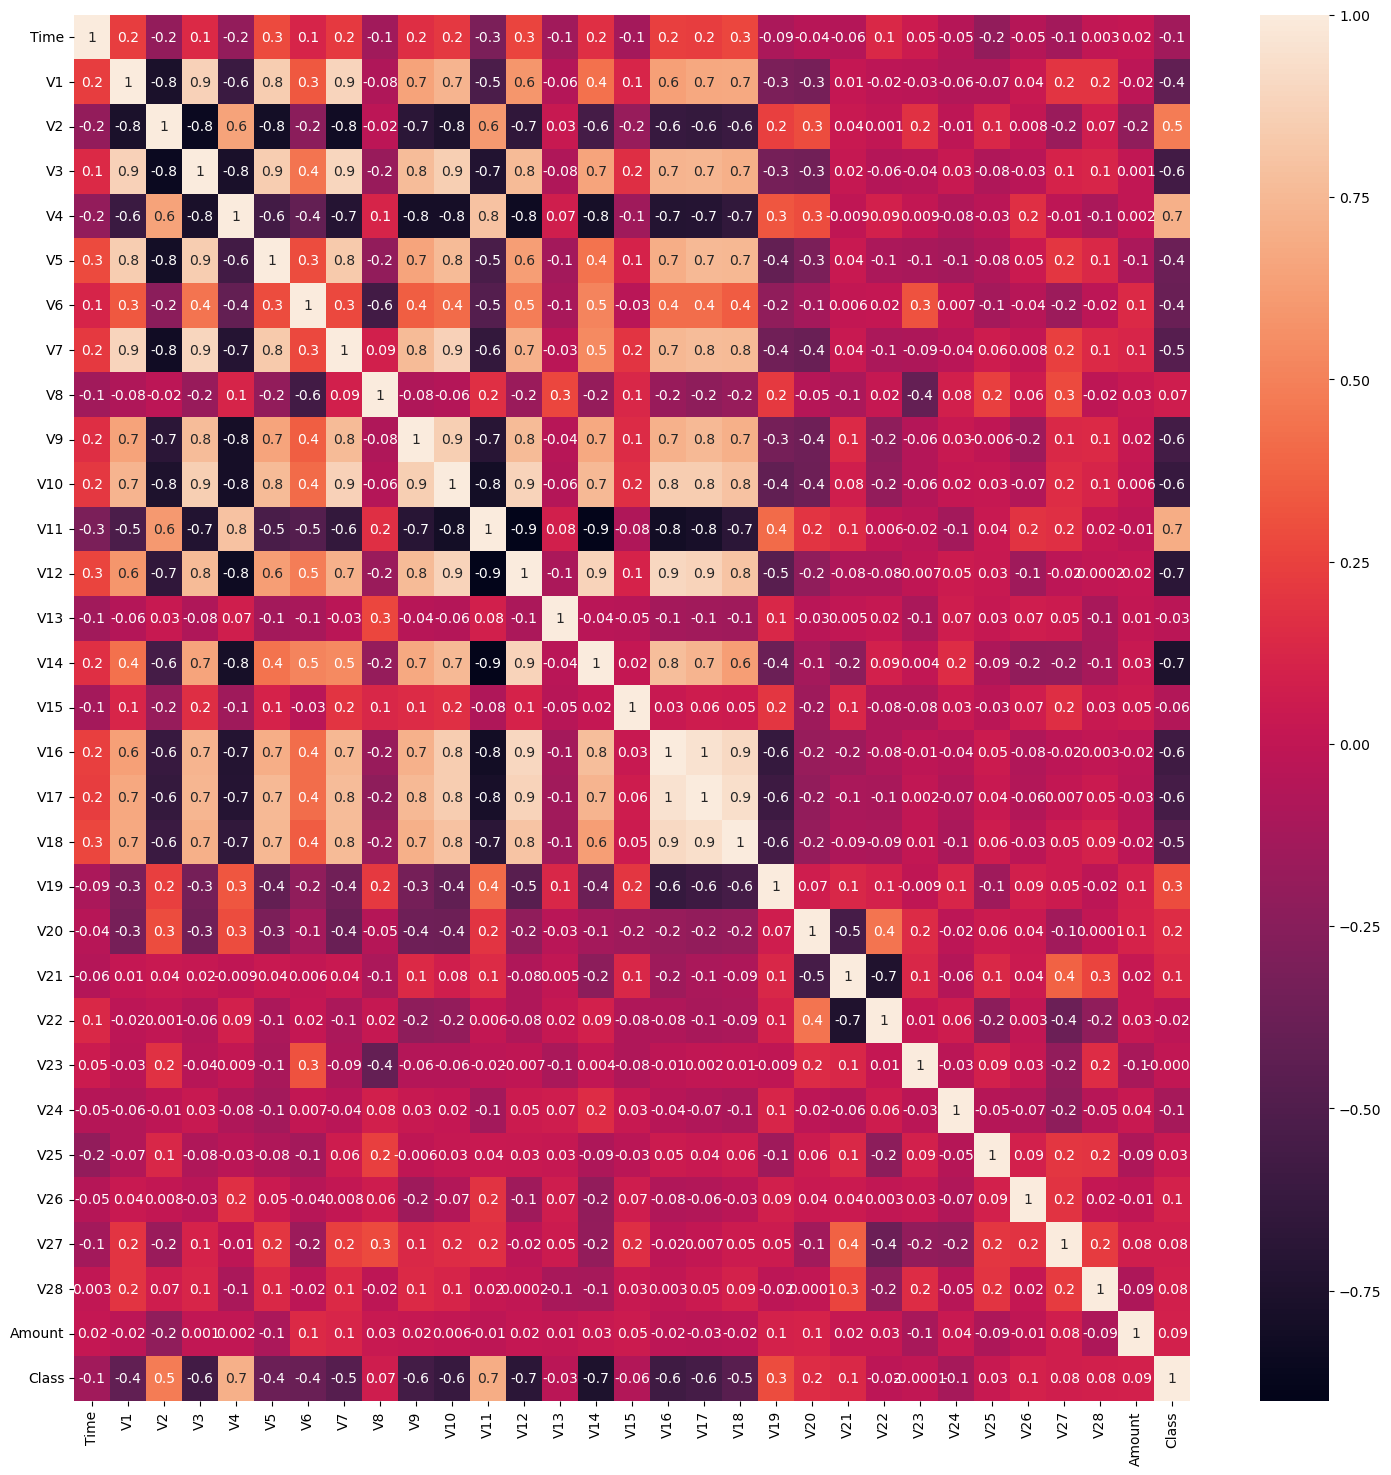

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, fmt='.1g')
plt.show()

We can see that V3, V9, V10, V12, V14, V16, V17 are **negatively** correlated to the target variable. Whereas, V2, V4, V11 are **positively** correlated to the target variable.

We will now carry out further analysis through visualizations to see the impact and relation of these variables on a transaction being fraudulent.

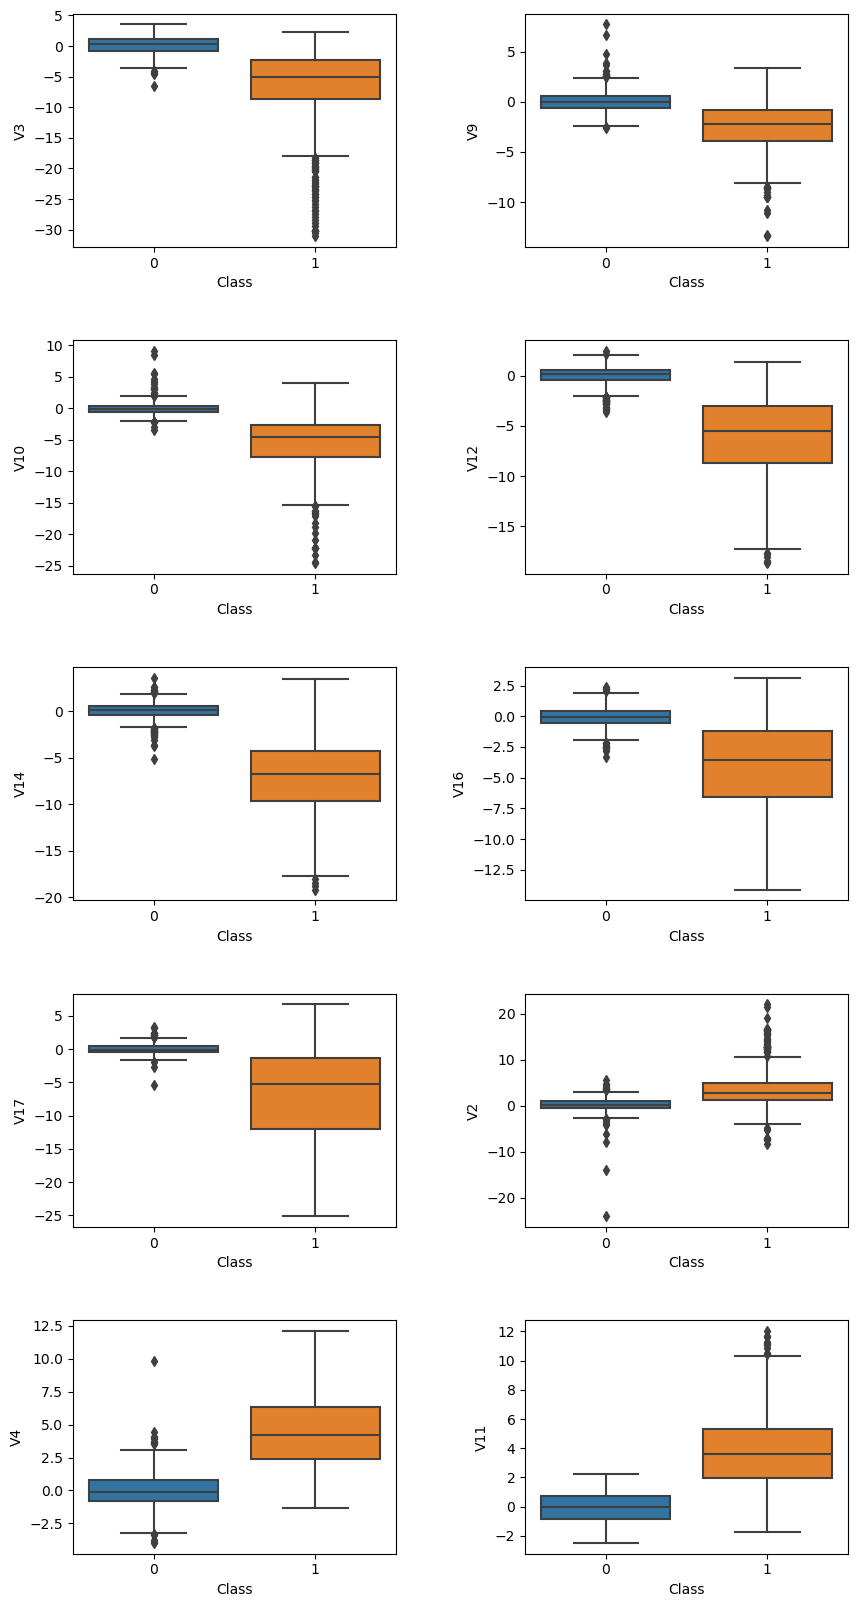

In [ ]:
var = ['V3', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V4', 'V11']

fig = plt.figure(figsize=(10, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, len(var)+1):
    ax = fig.add_subplot(5, 2, i)
    sns.boxplot(y=df.loc[:, var[i-1]], x=df['Class'], ax=ax)

The boxplots above uncover a very distinct relationship between the **Class** and other variables. We can clearly see that the variables with negative correlation have smaller value for fraudulent transactions while variables with positive correlation have greater value for fraudulent transactions as compared to non-fraudulent ones.

**Conclusion:** This means the lower the value for V3, V9, V10, V12, V14, V16, V17 is the more likely it is for the transaction to be fraudulent. And the higher the value for V2, V4, V11 is the more likely it is for the transaction to be fraudulent.

## Building Models

We will train 4 major classifiers to identify which one performs the best to detect fraud transactions. For the classifiers, **GridSearchCV** will be used to identify the best hyperparameters that give the best score.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X = df[['V3', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V4', 'V11']].values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr_params = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr = LogisticRegression()
lr_cv = GridSearchCV(lr, lr_params, cv=5)
lr_cv.fit(X_train, y_train)
lr_model = lr_cv.best_estimator_
lr_train_score = cross_val_score(lr_model, X_train, y_train, cv=5)

print("Best Model: ",lr_model)
print("Cross Val Score on Training data :", lr_train_score.mean())

Best Model:  LogisticRegression(C=0.01, solver='liblinear')
Cross Val Score on Training data : 0.9339434007901314


In [ ]:
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_predict

print('F1 Score: ', f1_score(y_train, lr_model.predict(X_train)))
print(classification_report(y_train, lr_model.predict(X_train)))

F1 Score:  0.9370816599732261
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       405
           1       0.96      0.92      0.94       382

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



### 2. SVM

In [ ]:
from sklearn.svm import SVC

svm_params = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svm = SVC()
svm_cv = GridSearchCV(svm, svm_params, cv=5)
svm_cv.fit(X_train, y_train)
svm_model = svm_cv.best_estimator_
svm_train_score = cross_val_score(svm_model, X_train, y_train, cv=5)

print("Best Model: ",svm_model)
print("Cross Val Score on Training data :", svm_train_score.mean())

Best Model:  SVC(C=10, kernel='linear')
Cross Val Score on Training data : 0.9352092235749415


In [ ]:
print('F1 Score: ', f1_score(y_train, svm_model.predict(X_train)))
print(classification_report(y_train, svm_model.predict(X_train)))

F1 Score:  0.9306122448979591
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       405
           1       0.97      0.90      0.93       382

    accuracy                           0.94       787
   macro avg       0.94      0.93      0.93       787
weighted avg       0.94      0.94      0.94       787



### 3. K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'n_neighbors': range(1, 25),
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1, 2, 3]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, knn_params, cv=5)
knn_cv.fit(X_train, y_train)
knn_model = knn_cv.best_estimator_
knn_train_score = cross_val_score(knn_model, X_train, y_train, cv=5)

print("Best Model: ", knn_model)
print("Cross Val Score on Training data :", knn_train_score.mean())

Best Model:  KNeighborsClassifier(n_neighbors=15)
Cross Val Score on Training data : 0.9364669837942433


In [ ]:
print('F1 Score: ', f1_score(y_train, knn_model.predict(X_train)))
print(classification_report(y_train, knn_model.predict(X_train)))

F1 Score:  0.9320388349514563
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       405
           1       0.99      0.88      0.93       382

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



### 4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_params = {'criterion': ['gini', 'entropy', 'log_loss'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,20)],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, tree_params, cv=5)
tree_cv.fit(X_train, y_train)
tree_model = tree_cv.best_estimator_
tree_train_score = cross_val_score(tree_model, X_train, y_train, cv=5)

print("Best Model: ", tree_model)
print("Cross Val Score on Training data :", tree_train_score.mean())

Best Model:  DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=10,
                       splitter='random')
Cross Val Score on Training data : 0.9072321212609852


In [ ]:
print('F1 Score: ', f1_score(y_train, knn_model.predict(X_train)))
print(classification_report(y_train, knn_model.predict(X_train)))

F1 Score:  0.9320388349514563
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       405
           1       0.99      0.88      0.93       382

    accuracy                           0.94       787
   macro avg       0.94      0.94      0.94       787
weighted avg       0.94      0.94      0.94       787



Now, we will get the models' performance on the whole original dataset to see if our model overfits (as all of these models give excellent scores above!)

In [ ]:
from sklearn.model_selection import StratifiedKFold

X = data_df[var]
y = data_df['Class']

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    orig_X_train, orig_X_test = X.iloc[train_index], X.iloc[test_index]
    orig_y_train, orig_y_test = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
orig_X_train = orig_X_train.values
orig_X_test = orig_X_test.values
orig_y_train = orig_y_train.values
orig_y_test = orig_y_test.values

Train: [ 56870  56963  56964 ... 284804 284805 284806] Test: [    0     1     2 ... 56960 56961 56962]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56870  56963  56964 ... 113928 113929 113930]
Train: [     0      1      2 ... 284804 284805 284806] Test: [109607 109645 109965 ... 170884 170885 170886]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170614 170836 170887 ... 227843 227844 227845]
Train: [     0      1      2 ... 227843 227844 227845] Test: [227846 227847 227848 ... 284804 284805 284806]


In [ ]:
print("Logistic Regression:\n", classification_report(orig_y_train, lr_model.predict(orig_X_train)))
print("SVM:\n", classification_report(orig_y_train, svm_model.predict(orig_X_train)))
print("KNN:\n", classification_report(orig_y_train, knn_model.predict(orig_X_train)))
print("Decision Tree:\n", classification_report(orig_y_train, tree_model.predict(orig_X_train)))

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    227452
           1       0.04      0.92      0.08       394

    accuracy                           0.96    227846
   macro avg       0.52      0.94      0.53    227846
weighted avg       1.00      0.96      0.98    227846

SVM:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    227452
           1       0.07      0.90      0.13       394

    accuracy                           0.98    227846
   macro avg       0.54      0.94      0.56    227846
weighted avg       1.00      0.98      0.99    227846

KNN:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227452
           1       0.14      0.88      0.24       394

    accuracy                           0.99    227846
   macro avg       0.57      0.94      0.62    227846
weighted avg       1.00      0.99      0

As expected! Our models clearly overfit as we can see that for fraud transactions our models have a very low score

In order to overcome overfitting while undersampling, we need to undersample our data while cross validating and not before cross validation.

## Undersampling during Cross Validation

We will go forward with the **Logistic Regression** model as it had the best cross validation score as well as the best precision-recall score when tried on original dataset. **KNN** is another choice for the model given its performance but I've chosen Logistic Regression right now.

In [ ]:
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, f1_score

usample_X = data_df.drop('Class', axis=1)[var]
usample_y = data_df['Class']

for train_index, test_index in skf.split(usample_X, usample_y):
    usample_X_train, usample_X_test = usample_X.iloc[train_index], usample_X.iloc[test_index]
    usample_y_train, usample_y_test = usample_y.iloc[train_index], usample_y.iloc[test_index]

usample_X_train = usample_X_train.values
usample_X_test = usample_X_test.values
usample_y_train = usample_y_train.values
usample_y_test = usample_y_test.values

usample_accuracy = []
usample_precision = []
usample_recall = []
usample_f1 = []
usample_auc = []

# Implementing NearMiss Technique
# Cross Validating to reduce overfitting
for train, test in skf.split(usample_X_train, usample_y_train):
    usample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), lr_model)  # Selected Logistic Regression model as it performed the best on cross-validation score
    usample_model = usample_pipeline.fit(usample_X_train[train], usample_y_train[train])
    usample_prediction = usample_model.predict(usample_X_train[test])

    usample_accuracy.append(usample_pipeline.score(orig_X_train[test], orig_y_train[test]))
    usample_precision.append(precision_score(orig_y_train[test], usample_prediction))
    usample_recall.append(recall_score(orig_y_train[test], usample_prediction))
    usample_f1.append(f1_score(orig_y_train[test], usample_prediction))
    usample_auc.append(roc_auc_score(orig_y_train[test], usample_prediction))

In [ ]:
print('Accuracy of undersampled data during cross-validation:', np.mean(usample_accuracy))
print('Precision Score of undersampled data during cross-validation:', np.mean(usample_precision))
print('Recall Score of undersampled data during cross-validation:', np.mean(usample_recall))
print('F1 Score of undersampled data during cross-validation:', np.mean(usample_f1))
print('AUC Score of undersampled data during cross-validation:', np.mean(usample_auc))

Accuracy of undersampled data during cross-validation: 0.7095885710275273
Precision Score of undersampled data during cross-validation: 0.0055541288681524225
Recall Score of undersampled data during cross-validation: 0.8834144758195391
F1 Score of undersampled data during cross-validation: 0.011034590973322014
AUC Score of undersampled data during cross-validation: 0.7963513494984659


In [ ]:
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(lr_model, X_train, y_train, cv=5, method="decision_function")

svc_pred = cross_val_predict(svm_model, X_train, y_train, cv=5, method="decision_function")

knears_pred = cross_val_predict(knn_model, X_train, y_train, cv=5)

tree_pred = cross_val_predict(tree_model, X_train, y_train, cv=5)

In [ ]:
print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9795294421821471
Support Vector Classifier:  0.9782367009243099
KNears Neighbors:  0.9347036390666408
Decision Tree Classifier:  0.9195171611401977


The cross validation prediction scores tell us that Logistic Regression is performing the best in both scenarios, undersampling before cross-validating and undersampling while cross-validating.

## Oversampling using SMOTE

**SMOTE:** Synthetic Minority Oversampling Technique.

SMOTE creates new synthetic data by interpolating the samples unlike in RandomUnderSampler which duplicates samples. This is one way to deal with imbalanced data.

In [ ]:
from imblearn.over_sampling import SMOTE

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []

# Logistic Regression performed the best so using it for oversampling as well

lr_params = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr = LogisticRegression()

log_reg_cv = GridSearchCV(lr, lr_params, cv=5)


# Implementing SMOTE Technique
# Cross Validating while training
# Parameters
for train, test in skf.split(orig_X_train, orig_y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg_cv)
    model = pipeline.fit(orig_X_train[train], orig_y_train[train])
    best_estimator = log_reg_cv.best_estimator_
    predictions = best_estimator.predict(orig_X_train[test])

    accuracy_scores.append(pipeline.score(orig_X_train[test], orig_y_train[test]))
    precision_scores.append(precision_score(orig_y_train[test], predictions))
    recall_scores.append(recall_score(orig_y_train[test], predictions))
    f1_scores.append(f1_score(orig_y_train[test], predictions))
    auc_scores.append(roc_auc_score(orig_y_train[test], predictions))

print("Accuracy:", np.mean(accuracy_scores))
print("Precision:", np.mean(precision_scores))
print("Recall:", np.mean(recall_scores))
print("F1-Score:", np.mean(f1_scores))

Accuracy: 0.9748031652612086
Precision: 0.059002576949495886
Recall: 0.9035702693930542
F1-Score: 0.11073818627310146


In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_estimator.predict(orig_X_test)
print(classification_report(orig_y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56863
       Fraud       0.06      0.91      0.11        98

    accuracy                           0.97     56961
   macro avg       0.53      0.94      0.55     56961
weighted avg       1.00      0.97      0.99     56961



In [ ]:
y_score = best_estimator.decision_function(orig_X_test)

In [ ]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(orig_y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.76


In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
smote = SMOTE(sampling_strategy='minority', random_state=42)

smote_X_train, smote_y_train = smote.fit_resample(orig_X_train, orig_y_train)

In [ ]:
lr_smote = log_reg_cv.best_estimator_
lr_smote.fit(smote_X_train, smote_y_train)
lr_smote_pred = lr_smote.predict(X_test)
print(classification_report(y_test, lr_smote_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



## Oversampling & Undersampling using SMOTEENN

SMOTE, while generating synthetic data, generates noisy data as well by interpolating new data between outliers and inliers of classes. So, noisy data can be cleaned from the oversampled space by **Tomek's links** or **Edited Nearest-Neighbors (ENN)**. These methods are added to the pipeline after SMOTE is applied for cleaning up.

Right now we will use only one of the cleaning methods to see if our results get better or not. We will be using SMOTEENN.

In [ ]:
from imblearn.combine import SMOTEENN
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
f1_scores2 = []
auc_scores2 = []

# Logistic Regression performed the best so using it for oversampling as well

lr_params = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr = LogisticRegression()

log_reg_cv = GridSearchCV(lr, lr_params, cv=5)


# Implementing SMOTEENN Technique
# Cross Validating while training
# Parameters
for train, test in skf.split(orig_X_train, orig_y_train):
    pipeline2 = imbalanced_make_pipeline(SMOTEENN(sampling_strategy='all'), log_reg_cv)
    smoteenn_model = pipeline2.fit(orig_X_train[train], orig_y_train[train])
    best_estimator2 = log_reg_cv.best_estimator_
    predictions2 = best_estimator2.predict(orig_X_train[test])

    accuracy_scores2.append(pipeline2.score(orig_X_train[test], orig_y_train[test]))
    precision_scores2.append(precision_score(orig_y_train[test], predictions2))
    recall_scores2.append(recall_score(orig_y_train[test], predictions2))
    f1_scores2.append(f1_score(orig_y_train[test], predictions2))
    auc_scores2.append(roc_auc_score(orig_y_train[test], predictions2))

print("Accuracy:", np.mean(accuracy_scores2))
print("Precision:", np.mean(precision_scores2))
print("Recall:", np.mean(recall_scores2))
print("F1-Score:", np.mean(f1_scores2))
print("AUC Score:", np.mean(auc_scores2))

Accuracy: 0.9739122123497204
Precision: 0.05711752313109967
Recall: 0.9035702693930542
F1-Score: 0.10740961974079725
AUC Score: 0.9388021832205771


In [ ]:
labels = ['No Fraud', 'Fraud']
smoteenn_prediction = best_estimator2.predict(orig_X_test)
print(classification_report(orig_y_test, smoteenn_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.99     56863
       Fraud       0.06      0.91      0.11        98

    accuracy                           0.97     56961
   macro avg       0.53      0.94      0.55     56961
weighted avg       1.00      0.97      0.99     56961



In [ ]:
y_score2 = best_estimator2.decision_function(orig_X_test)

In [ ]:
from sklearn.metrics import average_precision_score

average_precision_enn = average_precision_score(orig_y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision_enn))

Average precision-recall score: 0.76


In [ ]:
# SMOTEENN Technique after splitting and Cross Validating
smoteenn = SMOTEENN(sampling_strategy='all', random_state=42)

smoteenn_X_train, smoteenn_y_train = smoteenn.fit_resample(orig_X_train, orig_y_train)

In [ ]:
lr_smoteenn = log_reg_cv.best_estimator_
lr_smoteenn.fit(smoteenn_X_train, smoteenn_y_train)
lr_smoteenn_pred = lr_smoteenn.predict(X_test)
print(classification_report(y_test, lr_smoteenn_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197



## Evaluation

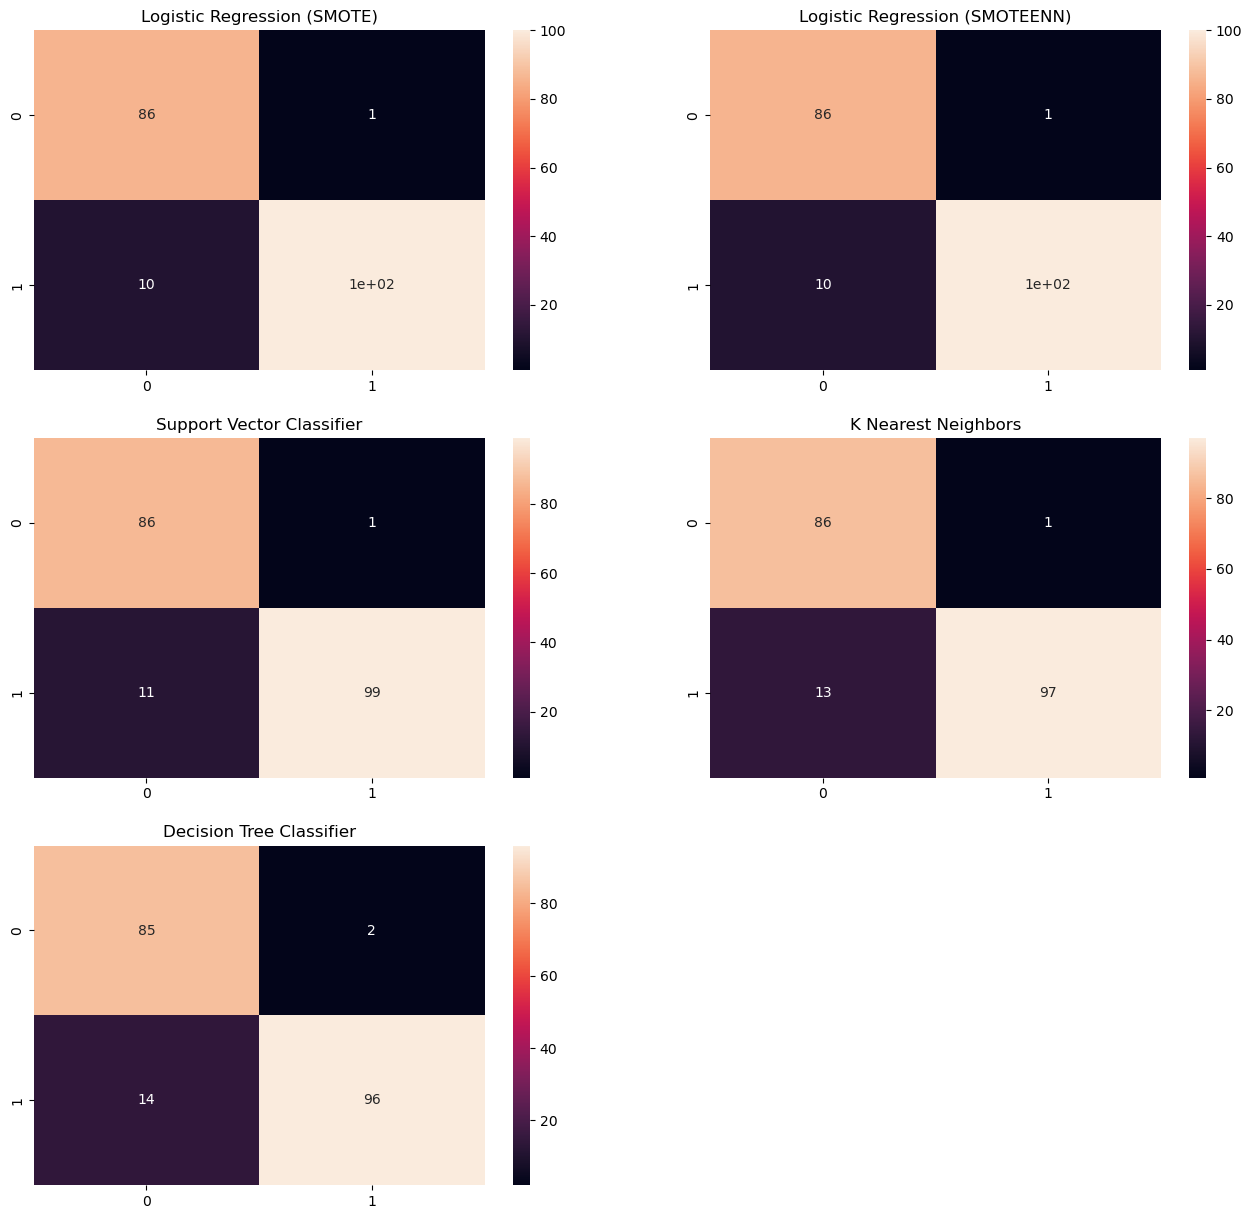

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted on oversampled data (SMOTE)
lr_smote_ypred = lr_smote.predict(X_test)

# Logistic Regression fitted on over & undersampled data (SMOTEENN)
lr_smoteenn_ypred = lr_smoteenn.predict(X_test)

# SVM, KNN, Decision Tree trained on undersampled data
svm_model_ypred = svm_model.predict(X_test)
knn_model_ypred = knn_model.predict(X_test)
tree_model_ypred = tree_model.predict(X_test)

fig = plt.figure(figsize=(16, 15))

fig1 = fig.add_subplot(321)
sns.heatmap(confusion_matrix(y_test, lr_smote_ypred), ax=fig1, annot=True)
fig1.set_title("Logistic Regression (SMOTE)")

fig2 = fig.add_subplot(322)
sns.heatmap(confusion_matrix(y_test, lr_smoteenn_ypred), ax=fig2, annot=True)
fig2.set_title("Logistic Regression (SMOTEENN)")

fig3 = fig.add_subplot(323)
sns.heatmap(confusion_matrix(y_test, svm_model_ypred), ax=fig3, annot=True)
fig3.set_title("Support Vector Classifier")

fig4 = fig.add_subplot(324)
sns.heatmap(confusion_matrix(y_test, knn_model_ypred), ax=fig4, annot=True)
fig4.set_title("K Nearest Neighbors")

fig5 = fig.add_subplot(325)
sns.heatmap(confusion_matrix(y_test, tree_model_ypred), ax=fig5, annot=True)
fig5.set_title("Decision Tree Classifier")

plt.show()

In [ ]:
print('Logistic Regression (SMOTE)')
print(classification_report(y_test, lr_smote_ypred))

print('Logistic Regression (SMOTEENN)')
print(classification_report(y_test, lr_smoteenn_ypred))

print('Support Vector Classifier')
print(classification_report(y_test, svm_model_ypred))

print('K Nearest Neighbors')
print(classification_report(y_test, knn_model_ypred))

print('Decision Tree Classifier')
print(classification_report(y_test, tree_model_ypred))

Logistic Regression (SMOTE)
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

Logistic Regression (SMOTEENN)
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        87
           1       0.99      0.91      0.95       110

    accuracy                           0.94       197
   macro avg       0.94      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197

Support Vector Classifier
              precision    recall  f1-score   support

           0       0.89      0.99      0.93        87
           1       0.99      0.90      0.94       110

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94

According to the **Confusion matrices** and **classification reports** for the five models, we can see that **SMOTEENN** and **SMOTE** on Logistic Regression perform almost the same and have a pretty good score. Another model which is performing good is **Support Vector Classifier** which can be used as well.

In [ ]:
# Score of Logistic Regression while Under Sampling
ypred = lr_model.predict(X_test)
lr_undersample_score = accuracy_score(y_test, ypred)

# Score of Logistic Regression while Over Sampling using SMOTE
ypred_smote = model.predict(orig_X_test)
smote_score = accuracy_score(orig_y_test, ypred_smote)

# Score of Logistic Regression while using SMOTEENN
ypred_smoteenn = smoteenn_model.predict(orig_X_test)
smoteenn_score = accuracy_score(orig_y_test, ypred_smoteenn)

print('Undersampling Score:', lr_undersample_score)
print('SMOTE Score:', smote_score)
print('SMOTEENN Score:', smoteenn_score)

Undersampling Score: 0.7563451776649747
SMOTE Score: 0.9755271150436263
SMOTEENN Score: 0.9746142097224416


## Conclusion

Implementing SMOTE and SMOTEENN significantly increased the performance of the selected model when our data was highly imbalanced. Without implementing any balancing technique, our models were highly overfitted with very bad scores for detecting fraud transactions. This shows that balancing the classes by using any approach is necessary when dealing with imbalanced data. The first approach we used was undersampling where the performance increased but it was still misclassifying non-fraudulent transactions as fraudulent. This would surely increase dissatisfaction among the users if their normal transactions are reported as fraudulent and would certainly lead to a huge loss for the company. Therefore, we need to be careful to select the approach that would reduce both type of errors: Fraud transactions as non-fraudulent, and Not Fraud transactions as Fraudulent.